In [276]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
rng = np.random.default_rng(seed=123)
community_sizes = [60, 60, 40]
new_nodes = 30

In [278]:
num_points = 200
theta = rng.uniform(0,2*np.pi, num_points)
radius = rng.uniform(0,1, num_points) ** 0.5

x = radius * np.cos(theta)
y = radius * np.sin(theta)
samples = np.vstack([x,y]).T

In [279]:
community = np.full(samples.shape[0], -1)
seeds = []

for i, n in enumerate(community_sizes):
    unassigned = samples[community==-1, :]
    magnitudes = np.sqrt(np.sum(unassigned**2,axis=1))
    furthest_id = np.argmax(magnitudes)
    furthest = unassigned[furthest_id, :]
    dist_to_furthest = np.sqrt(np.sum((unassigned - furthest)**2, axis=1))
    primary_members = np.argsort(dist_to_furthest)[:n]
    original_indices = np.arange(samples.shape[0])[community==-1]
    community[original_indices[primary_members]] = i
    seeds.append(original_indices[furthest_id])

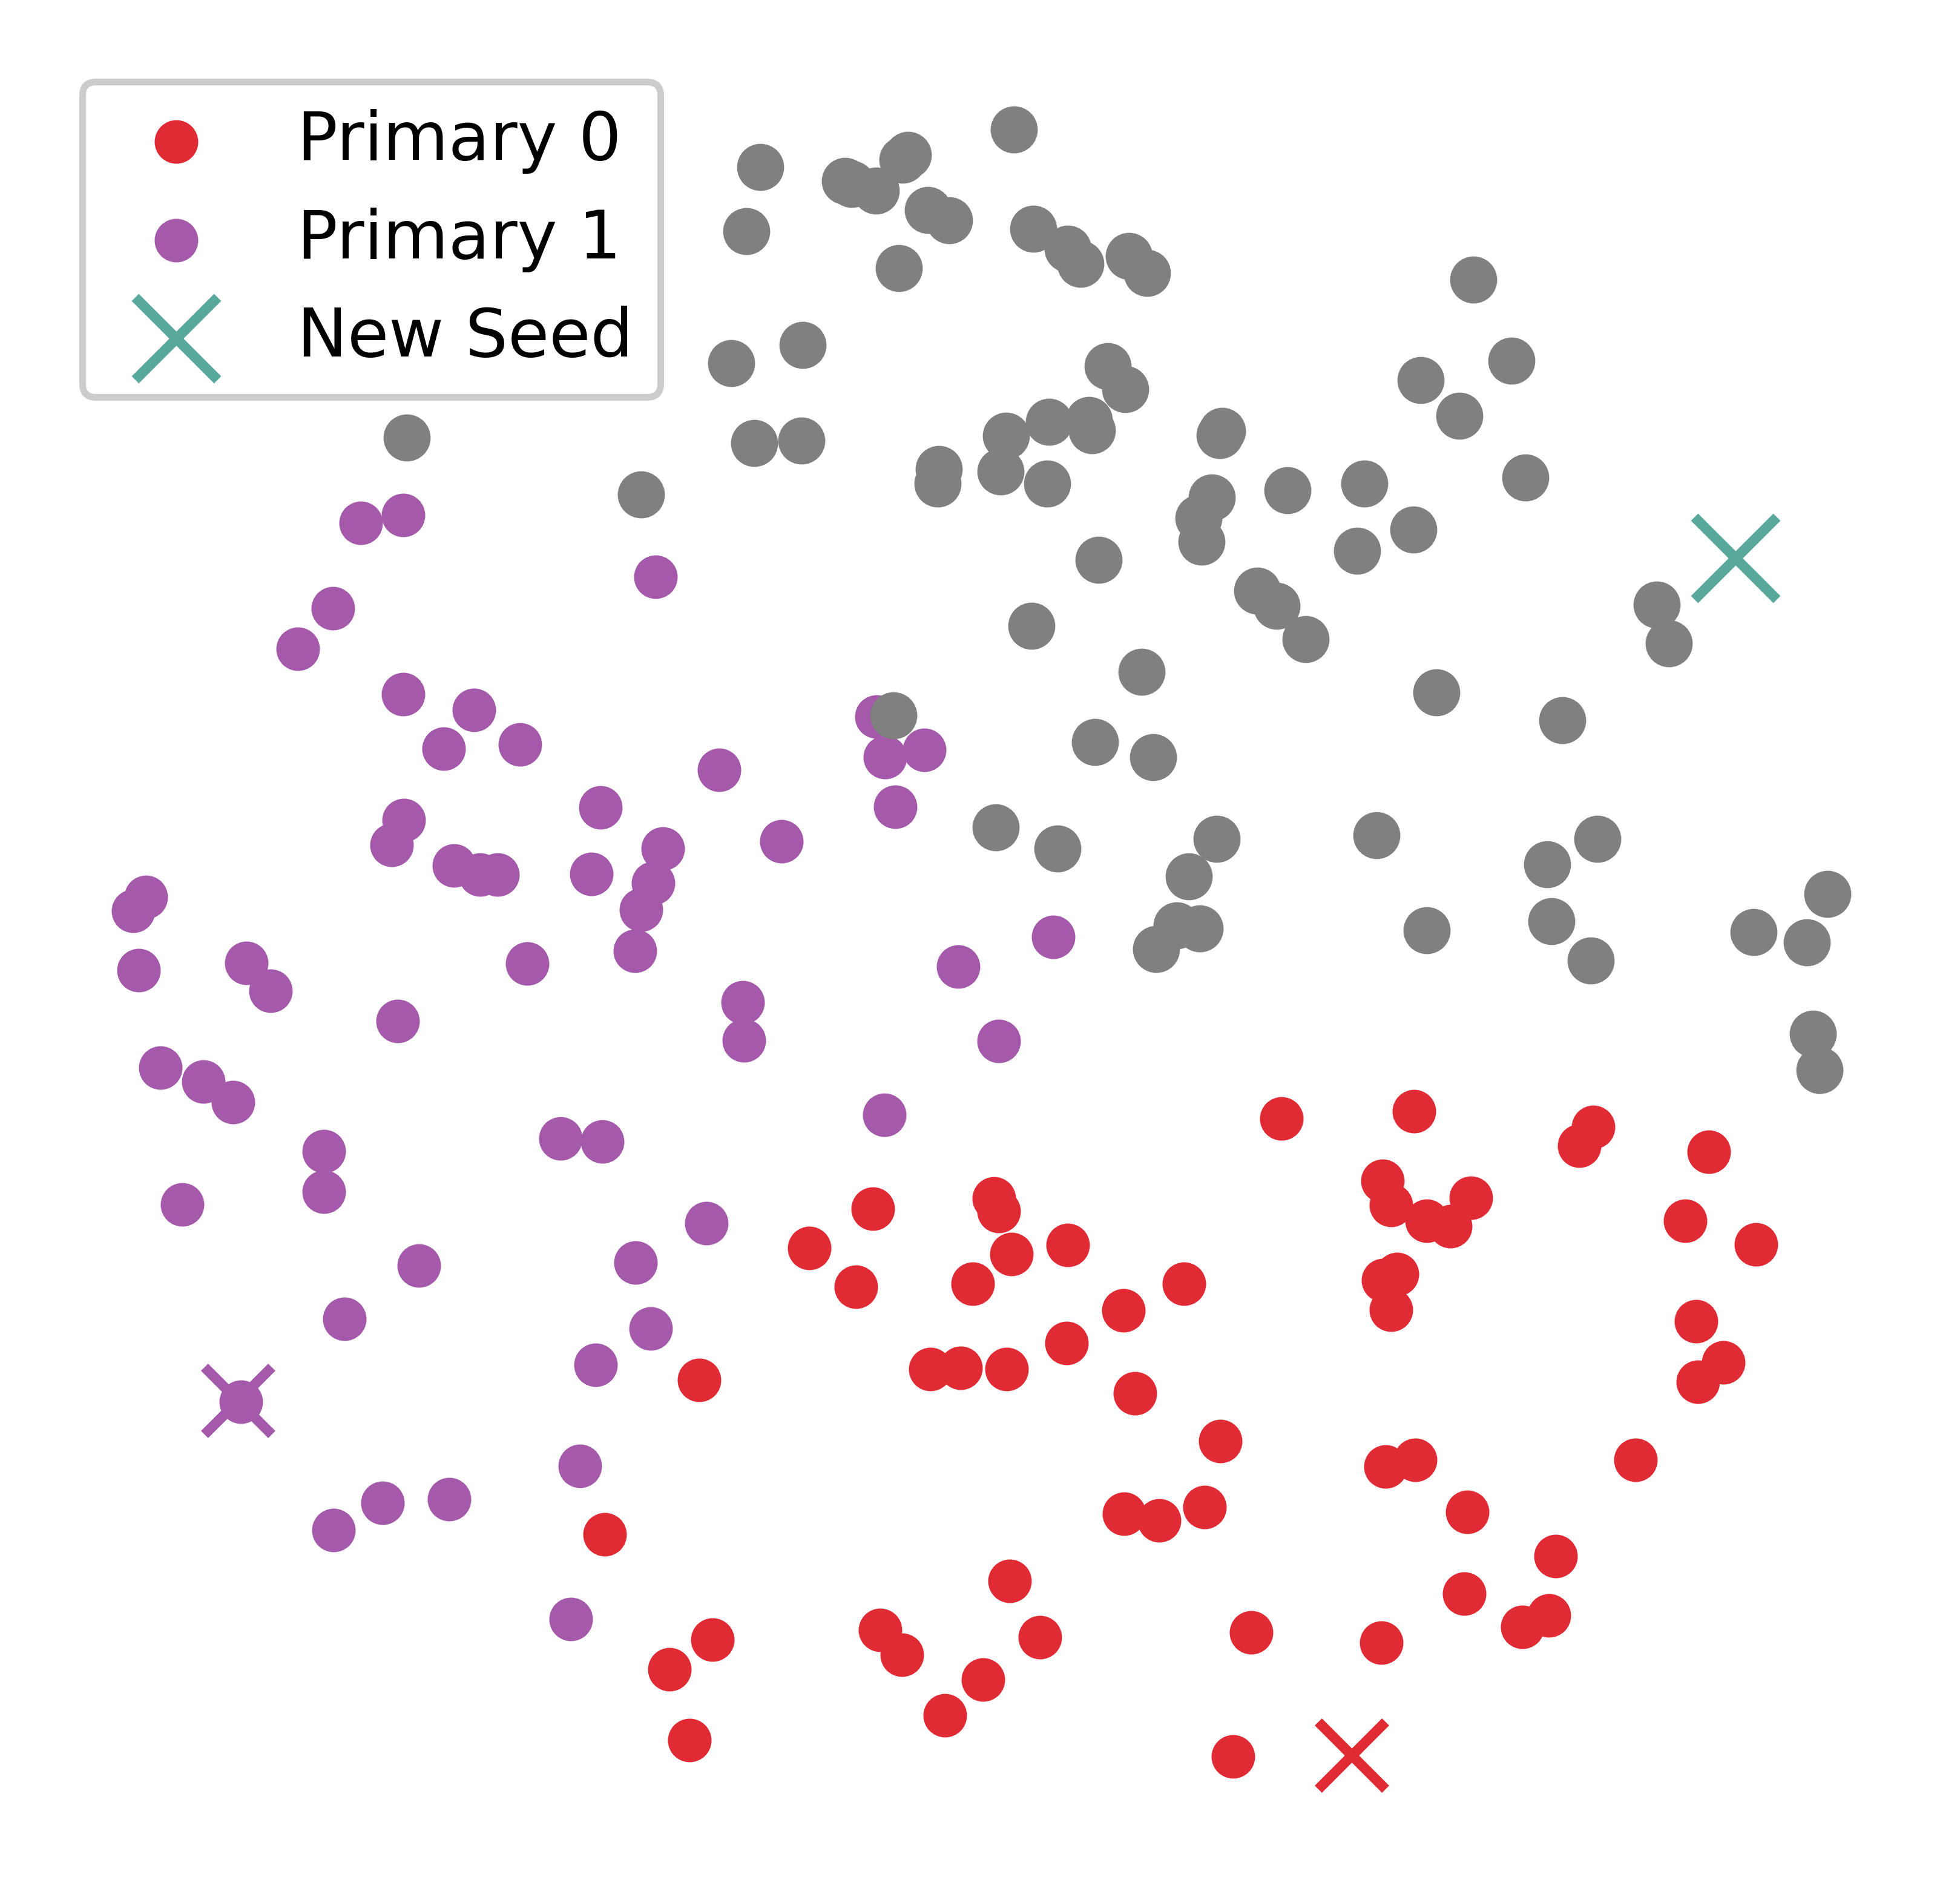

In [280]:
fig, ax = plt.subplots(dpi=800)
colors = ["#e02b35", "#a559aa", "#59a89c", "#f0c571", "#082a54"]
for i in range(2):
    members = community == i
    members[seeds[i]] = False  # Plot seed seperately
    ax.scatter(samples[members, 0], samples[members, 1], label=f"Primary {i}", color=colors[i], s=30)
    ax.scatter(samples[seeds[i], 0], samples[seeds[i], 1], marker="x", color=colors[i], s=100)
ax.scatter(samples[community == -1, 0], samples[community == -1, 1], color=(0.5, 0.5, 0.5))

# Plot community 2 as grey
members = community == 2
members[seeds[2]] = False  # Plot seed seperately
ax.scatter(samples[members, 0], samples[members, 1], color=(0.5, 0.5, 0.5))
# Plot community 2 seed node
ax.scatter(samples[seeds[2], 0], samples[seeds[2], 1], marker="x", color=colors[2], s=150, label="New Seed")

ax.set_aspect('equal')
ax.set_axis_off()
ax.legend(framealpha=1, loc="upper left")

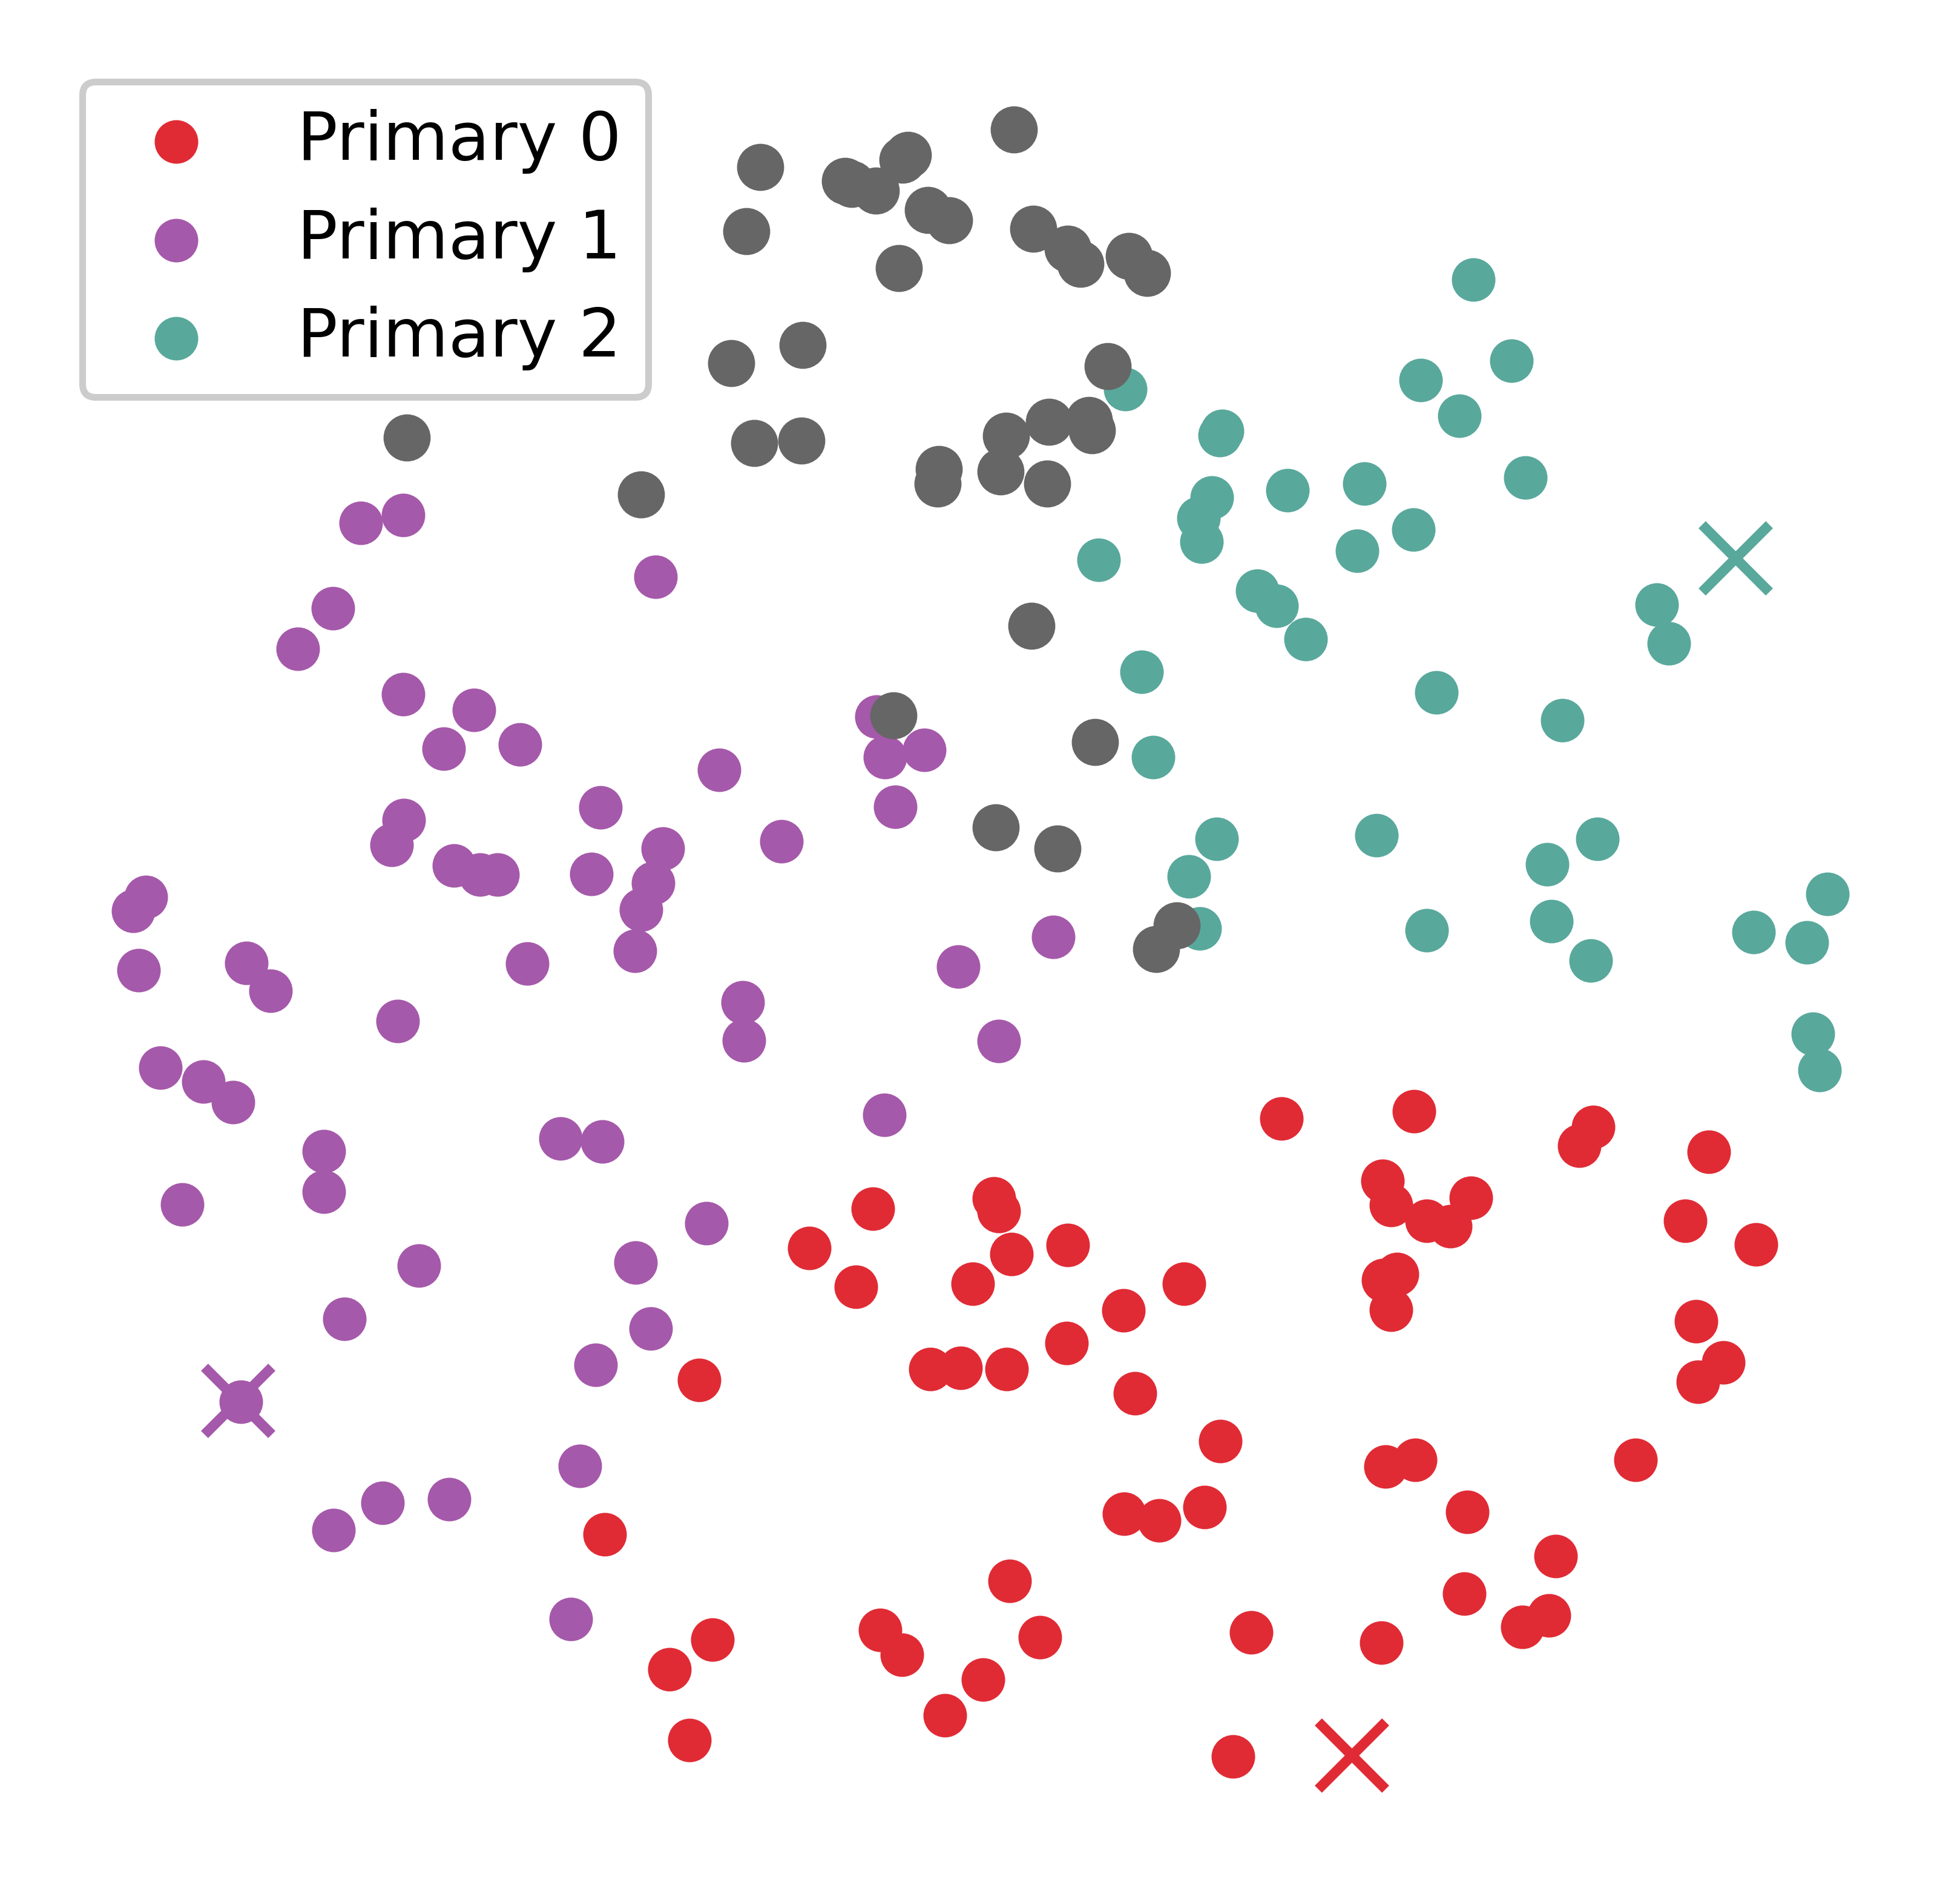

In [281]:
fig, ax = plt.subplots(dpi=800)
for i in range(len(community_sizes)):
    members = community == i
    members[seeds[i]] = False  # Plot seed seperately
    ax.scatter(samples[members, 0], samples[members, 1], label=f"Primary {i}", color=colors[i], s=30)
    ax.scatter(samples[seeds[i], 0], samples[seeds[i], 1], marker="x", color=colors[i], s=100)
ax.scatter(samples[community == -1, 0], samples[community == -1, 1], color=(0.4, 0.4, 0.4))

ax.set_aspect('equal')
ax.set_axis_off()
#ax.set_title("Fill primary community as unassigned\nnodes closest to the seed", fontsize=18)
ax.legend(framealpha=1, loc="upper left")

In [282]:
center = np.mean(samples[community == 2, :], axis=0)
other_coms = samples[community != 2]
original_ids = np.arange(len(community))[community != 2]
distances_to_center = np.sqrt(np.sum((other_coms - center)**2, axis=1))
new_ids = np.argsort(distances_to_center)[:new_nodes]
new_original_ids = original_ids[new_ids]

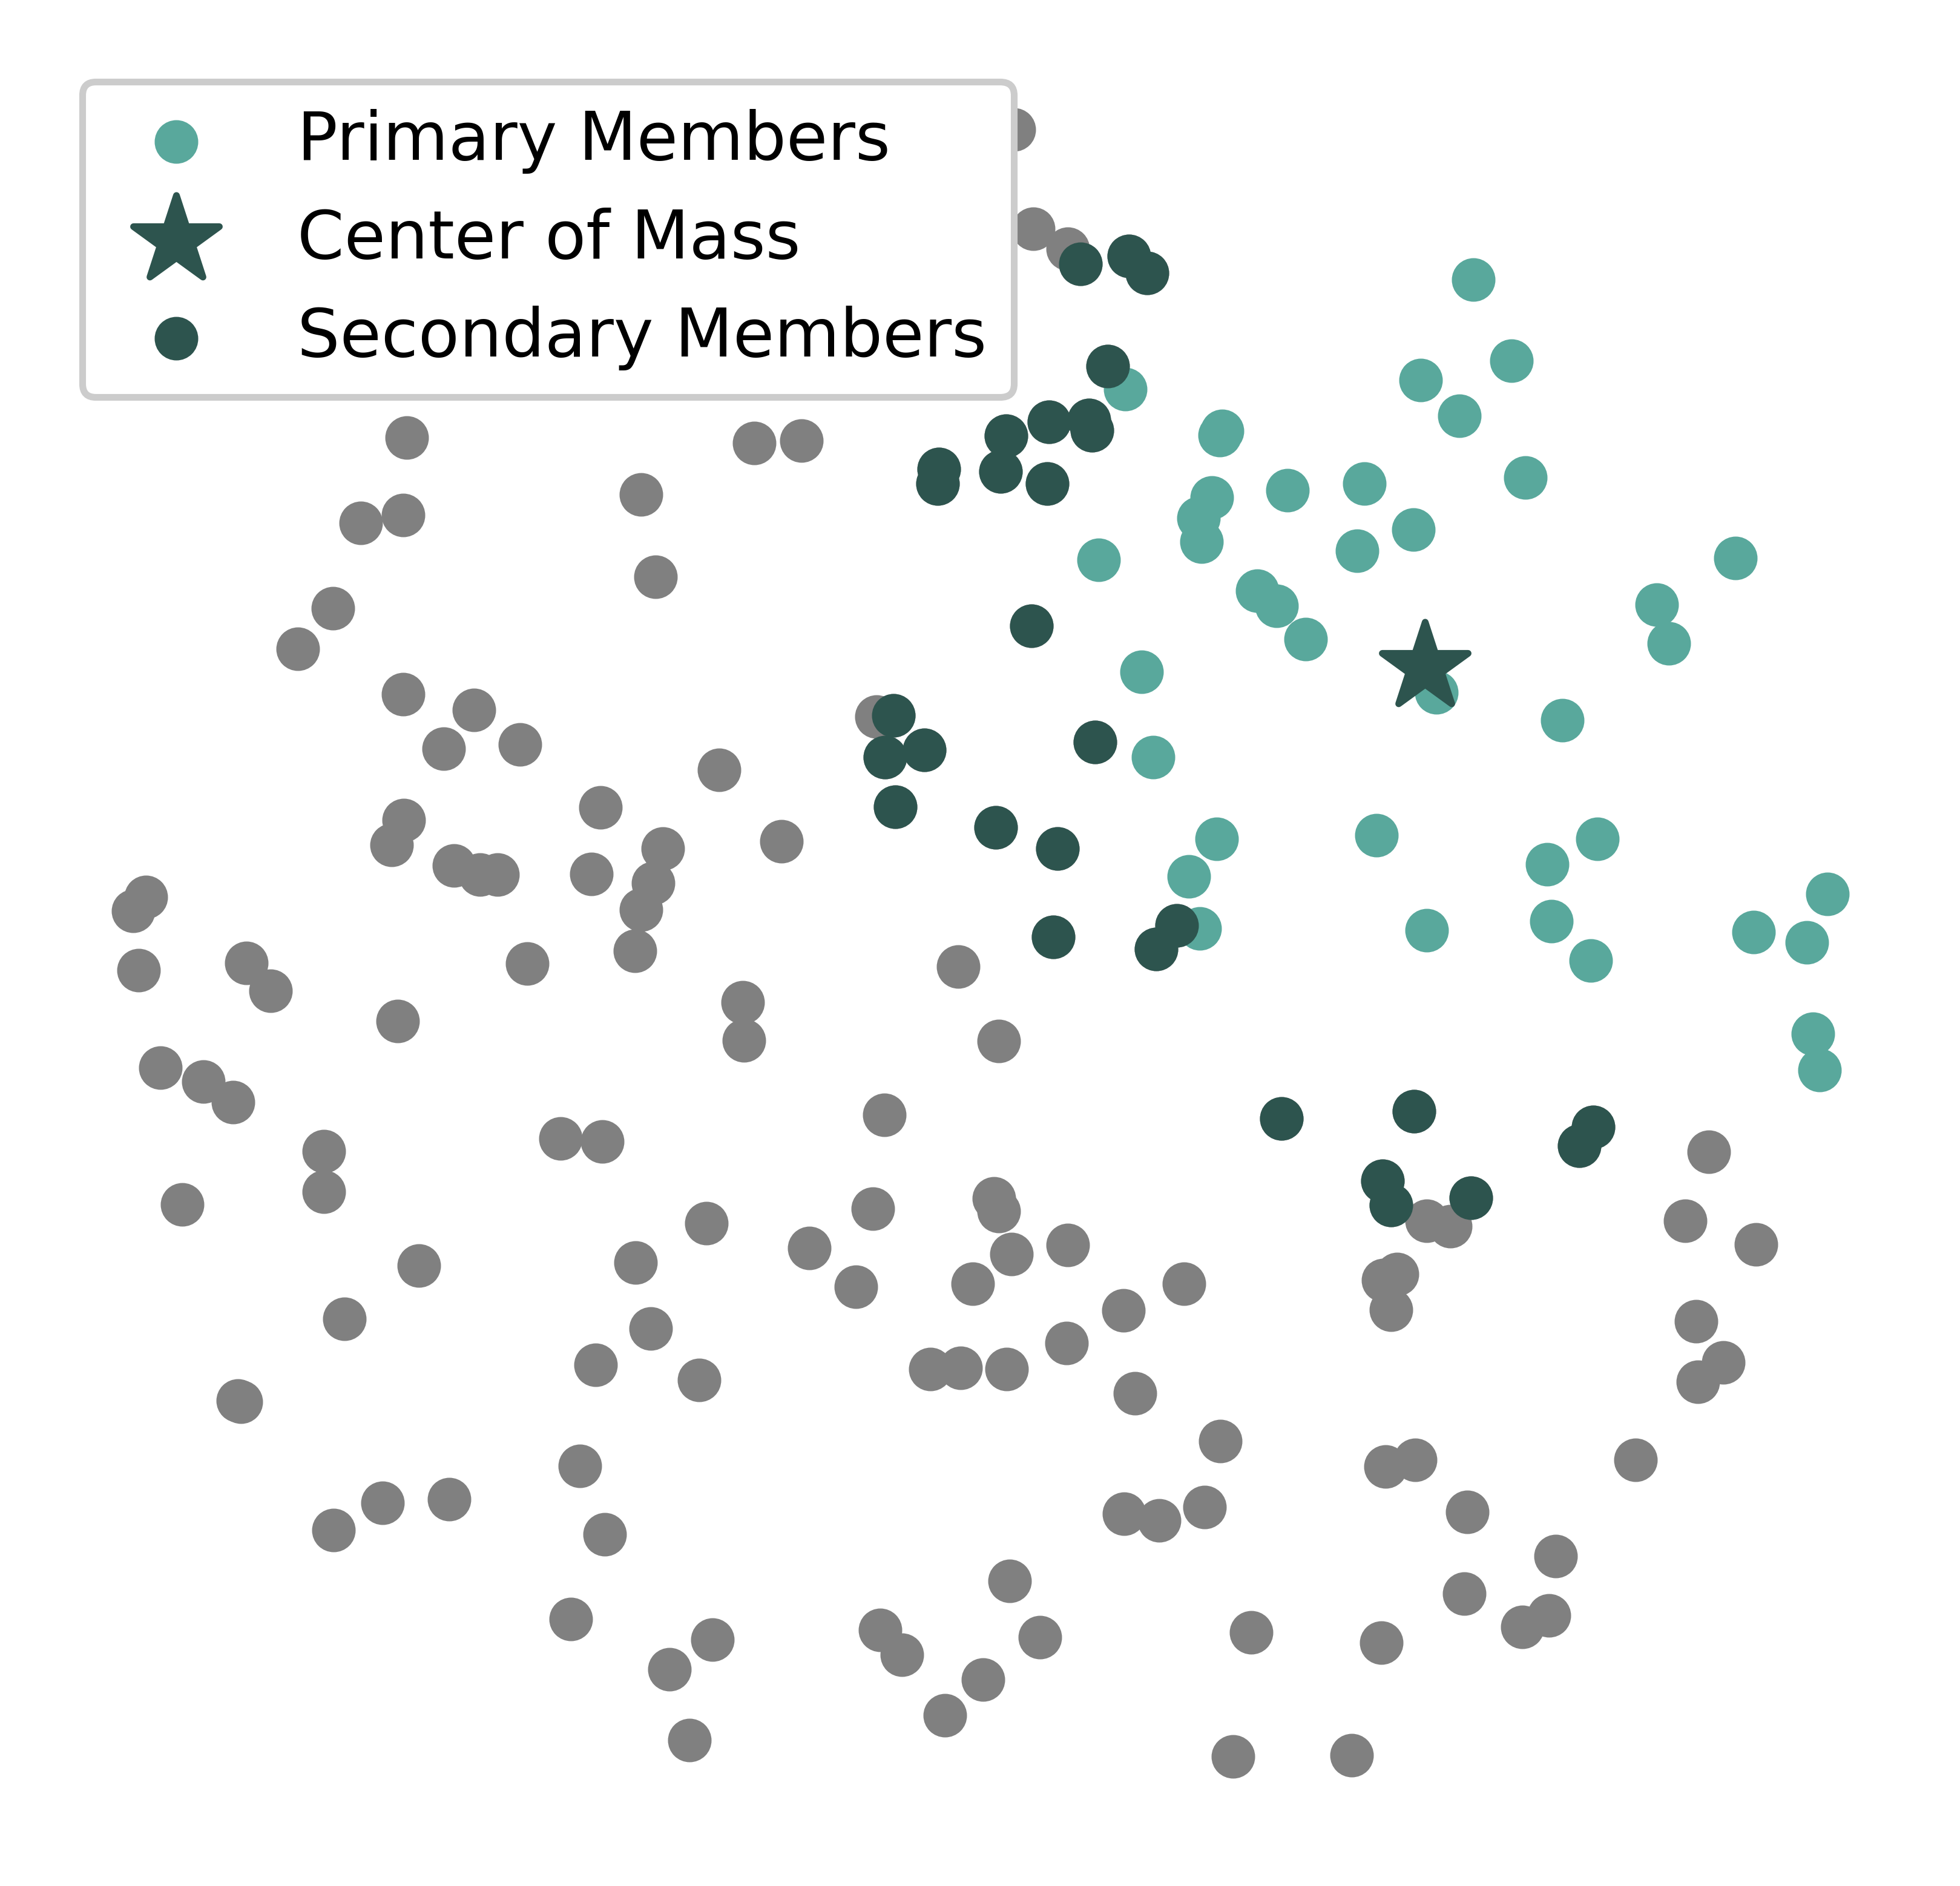

In [283]:
fig, ax = plt.subplots(dpi=800)
ax.scatter(samples[community != 2, 0], samples[community != 2, 1], color=(0.5, 0.5, 0.5), s=30)
ax.scatter(samples[community == 2, 0], samples[community == 2,1], label="Primary Members", color=colors[2], s=30)
ax.scatter(center[0], center[1], marker="*", s=180, color="#2d544e", label="Center of Mass")
ax.scatter(samples[new_original_ids, 0], samples[new_original_ids,1], s=30, color="#2d544e", label="Secondary Members")

ax.legend(framealpha=1, loc="upper left")
ax.set_aspect('equal')
ax.set_axis_off()
#ax.set_title("Expand community around\ncenter of mass", fontsize=18)